In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# from plotly import tools
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format

df =pd.read_csv('Student Info.csv')
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [2]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [3]:
df['failures'].value_counts()

failures
0    861
1    120
2     33
3     30
Name: count, dtype: int64

# Splitting the dataset for quicker accessablilty

In [4]:
import pandas as pd


df = pd.read_csv('Student Info.csv')


selected_columns = ['famsize', 'Pstatus', 'Mjob' , 'Fjob' , 'reason' , 'guardian' , 'schoolsup' , 'famsup' , 'paid' , 'activities' , 'nursery' , 'internet' , 'romantic' , 'famrel' , 'freetime' , 'goout' , 'Dalc' , 'Walc' , 'health' , 'G1' , 'G2' , 'G3' , 'Medu' , 'Fedu']


split_ratio = 1.0
split_index = int(len(df) * split_ratio)


df_part1 = df.loc[:split_index, selected_columns]
df_part2 = df.loc[split_index:, selected_columns]


df_part1.to_csv('social_life_1.csv', index=False)
df_part2.to_csv('social_life_2.csv', index=False)




# Converting the characters to numeric values for finding the corr()

In [5]:
df = pd.read_csv('social_life_1.csv')

#Famsize  (GT3 - 0 , LE3 - 1)
df['famsize'] = df['famsize'].replace('GT3' , 0)
df['famsize'] = df['famsize'].replace('LE3' , 1)

#Pstatus  (A - 0 , T - 1)
df['Pstatus'] = df['Pstatus'].replace('A' , 0)
df['Pstatus'] = df['Pstatus'].replace('T' , 1)

#Mjob  (at_home - 0 , health - 1 , other - 2 , services - 3 , health - 4)
df['Mjob'] = df['Mjob'].replace('at_home' , 0)
df['Mjob'] = df['Mjob'].replace('health' , 1)
df['Mjob'] = df['Mjob'].replace('other' , 2)
df['Mjob'] = df['Mjob'].replace('services' , 3)
df['Mjob'] = df['Mjob'].replace('teacher' , 4)

#Fjob
df['Fjob'] = df['Fjob'].replace('at_home' , 0)
df['Fjob'] = df['Fjob'].replace('teacher' , 1)
df['Fjob'] = df['Fjob'].replace('other' , 2)
df['Fjob'] = df['Fjob'].replace('services' , 3)
df['Fjob'] = df['Fjob'].replace('health' , 4)
# print(df['Mjob'].to_string())

#reason
df['reason'] = df['reason'].replace('course' , 0)
df['reason'] = df['reason'].replace('other' , 1)
df['reason'] = df['reason'].replace('home' , 2)
df['reason'] = df['reason'].replace('reputation' , 3)
# print(df['reason'].to_string())

#guardian
df['guardian'] = df['guardian'].replace('mother' , 0)
df['guardian'] = df['guardian'].replace('father' , 1)
df['guardian'] = df['guardian'].replace('other' , 2)
# print(df['guardian'].to_string())

#schoolsup
df['schoolsup'] = df['schoolsup'].replace('yes' , 0)
df['schoolsup'] = df['schoolsup'].replace('no' , 1)

#famsup
df['famsup'] = df['famsup'].replace('yes' , 0)
df['famsup'] = df['famsup'].replace('no' , 1)

#paid
df['paid'] = df['paid'].replace('yes' , 0)
df['paid'] = df['paid'].replace('no' , 1)

#activities
df['activities'] = df['activities'].replace('yes' , 0)
df['activities'] = df['activities'].replace('no' , 1)

#nursery
df['nursery'] = df['nursery'].replace('yes' , 0)
df['nursery'] = df['nursery'].replace('no' , 1)

#internet
df['internet'] = df['internet'].replace('yes' , 0)
df['internet'] = df['internet'].replace('no' , 1)

#romantic
df['romantic'] = df['romantic'].replace('yes' , 0)
df['romantic'] = df['romantic'].replace('no' , 1)


# print(df.to_string())

new = df.to_csv('social_life.csv' , index=False)


1. how does the parents education effect G3

2. Education and JOB bg, how correlated are they

3. Address and their grade(Scores distribution)

4. Failures and Fam relation.(school support, fam support)


### 1. How does Parents education effect Grade3
### 2. Education and JOB bg, How correlated are these columns.



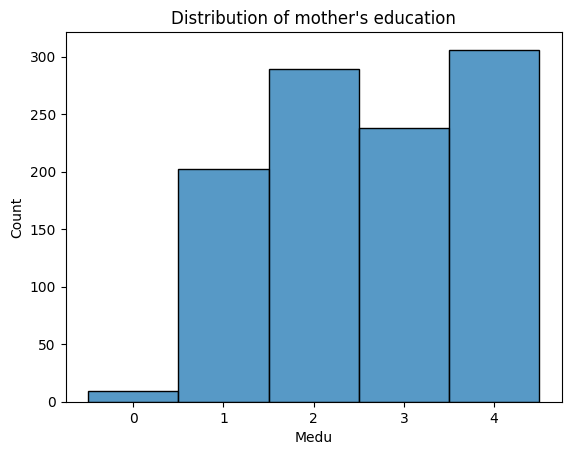

,proportion
Medu,
4,0.29
2,0.28
3,0.23
1,0.19
0,0.01


In [6]:
import seaborn as sns

df=pd.read_csv('Student Info.csv')

sns.histplot(df['Medu'], discrete=True)
plt.title('Distribution of mother\'s education')
plt.show()
df['Medu'].value_counts(normalize=True).to_frame()

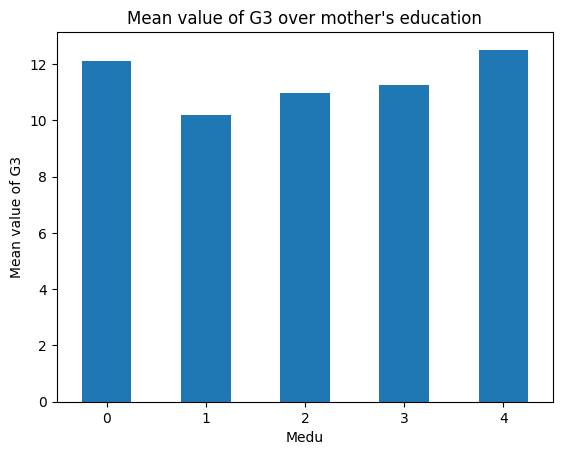

In [7]:
df.groupby('Medu')['G3'].mean().plot(kind='bar')
plt.title('Mean value of G3 over mother\'s education')
plt.ylabel('Mean value of G3')
plt.xticks(rotation=0)
plt.show()

In [8]:
avg = df.G3.mean()
df["type"] = df.G3.apply(lambda x: "above average" if x > avg else "below average")

In [40]:
import plotly.graph_objects as go
# Creating traces for each bar
information_reset = df.groupby('type')[['Medu', 'Fedu']].mean().reset_index()

# Specify the width of the bars
bar_width = 0.09 # Adjust the width as needed

trace_medu = go.Bar(
    x=information_reset['type'],
    y=information_reset['Medu'],
    name='Medu',
    marker=dict(color='#3498db'),  # Blue color for Medu
    width=bar_width,
)

trace_fedu = go.Bar(
    x=information_reset['type'],
    y=information_reset['Fedu'],
    name='Fedu',
    marker=dict(color='#e74c3c'),  # Red color for Fedu
    width=bar_width,
)

# Creating the layout
layout = go.Layout(
    title='Going out for Different Types',
    xaxis=dict(title='Type'),
    yaxis=dict(title='Average Going out Level'),
     barmode='group',  # Grouped bar mode
)

# Creating the figure
fig = go.Figure(data=[trace_medu], layout=layout)
fig.update_traces(width=0.1)
# Show the plot
fig.show()

In [ ]:
df['Medu'].value_counts()

Medu
4    306
2    289
3    238
1    202
0      9
Name: count, dtype: int64

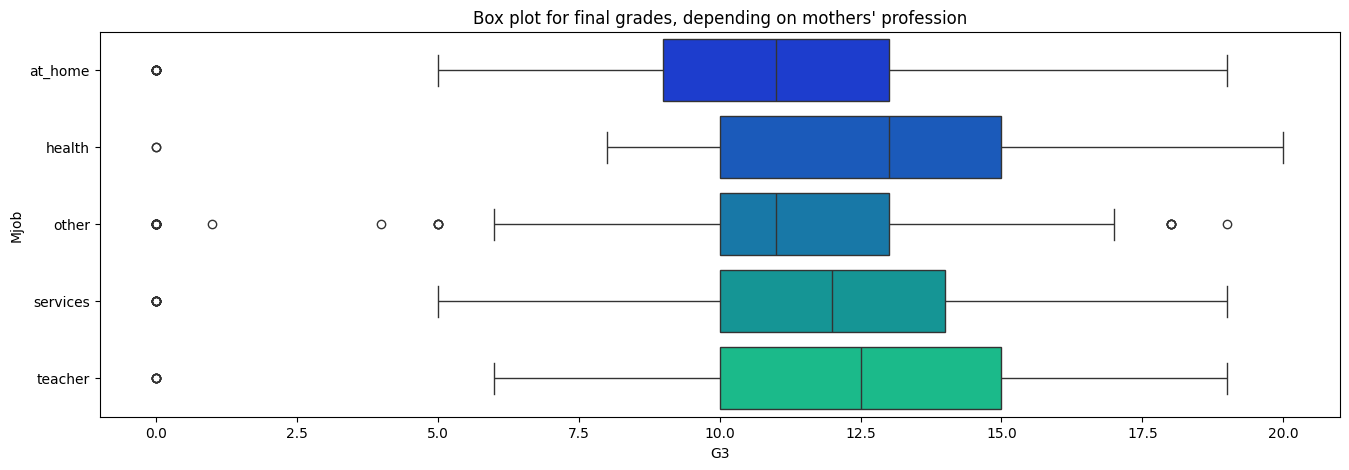

T-test Results for at_home vs health (Mothers' Profession):
  - t-statistic: -4.52270256202042
  - p-value: 9.100169887118825e-06
T-test Results for at_home vs other (Mothers' Profession):
  - t-statistic: -1.6475757848829655
  - p-value: 0.09997127813662181
T-test Results for at_home vs services (Mothers' Profession):
  - t-statistic: -3.226346007582421
  - p-value: 0.0013494031675146726
T-test Results for at_home vs teacher (Mothers' Profession):
  - t-statistic: -3.9788689709276124
  - p-value: 8.558938089155318e-05
T-test Results for health vs other (Mothers' Profession):
  - t-statistic: 3.645255997853322
  - p-value: 0.0002963572588061498
T-test Results for health vs services (Mothers' Profession):
  - t-statistic: 2.1137967599064686
  - p-value: 0.035308520362087474
T-test Results for health vs teacher (Mothers' Profession):
  - t-statistic: 0.8861256200531701
  - p-value: 0.3765634372928701
T-test Results for other vs services (Mothers' Profession):
  - t-statistic: -2.05568806

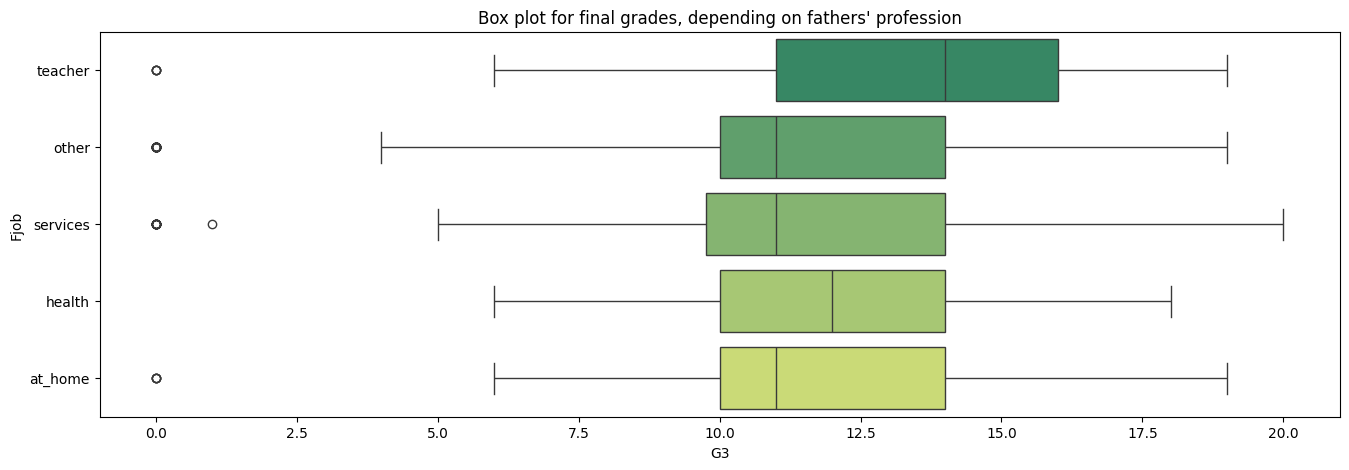

T-test Results for teacher vs other (Fathers' Profession):
  - t-statistic: 3.189502386791102
  - p-value: 0.0014940077981421605
T-test Results for teacher vs services (Fathers' Profession):
  - t-statistic: 3.150530345783103
  - p-value: 0.0017681757790097507
T-test Results for teacher vs health (Fathers' Profession):
  - t-statistic: 0.8888438638860251
  - p-value: 0.376138254915382
T-test Results for teacher vs at_home (Fathers' Profession):
  - t-statistic: 2.439017506774108
  - p-value: 0.01613152925496492
T-test Results for other vs services (Fathers' Profession):
  - t-statistic: 0.5013123570582877
  - p-value: 0.6162775491809366
T-test Results for other vs health (Fathers' Profession):
  - t-statistic: -1.4717090135266093
  - p-value: 0.14160441404829485
T-test Results for other vs at_home (Fathers' Profession):
  - t-statistic: 0.4828246275243822
  - p-value: 0.6293843461430798
T-test Results for services vs health (Fathers' Profession):
  - t-statistic: -1.601085021826303
  -

In [ ]:
plt.figure(figsize=(16, 5))

# Box plot for final grades depending on mothers' profession
plt.title("Box plot for final grades, depending on mothers' profession")
sns.boxplot(y="Mjob", x="G3", data=df, orient="h", palette='winter')

# Show the plot
plt.show()

# Perform t-tests for mothers' professions
job_categories = df['Mjob'].unique()
for category1, category2 in combinations(job_categories, 2):
    category1_grades = df['G3'][df['Mjob'] == category1]
    category2_grades = df['G3'][df['Mjob'] == category2]
    
    # Perform t-test
    t_stat, p_value = ttest_ind(category1_grades, category2_grades, nan_policy='omit')
    
    # Print the results
    print(f'T-test Results for {category1} vs {category2} (Mothers\' Profession):\n  - t-statistic: {t_stat}\n  - p-value: {p_value}')

# Set the figure size
plt.figure(figsize=(16, 5))

# Box plot for final grades depending on fathers' profession
plt.title("Box plot for final grades, depending on fathers' profession")
sns.boxplot(y="Fjob", x="G3", data=df, orient="h", palette='summer')

# Show the plot
plt.show()

# Perform t-tests for fathers' professions
job_categories = df['Fjob'].unique()
for category1, category2 in combinations(job_categories, 2):
    category1_grades = df['G3'][df['Fjob'] == category1]
    category2_grades = df['G3'][df['Fjob'] == category2]
    
    # Perform t-test
    t_stat, p_value = ttest_ind(category1_grades, category2_grades, nan_policy='omit')
    
    # Print the results
    print(f'T-test Results for {category1} vs {category2} (Fathers\' Profession):\n  - t-statistic: {t_stat}\n  - p-value: {p_value}')

It seems that mothers working in medicine instill in their children a great love for mathematics. (Someone doesn't like math? Nonsense...) Last but not least, the quality of family relationships. It is a pity that you don't know what put the rating - children or parents.

### 7. Romantic with the Grades. Hence their comparison with the Attendance.

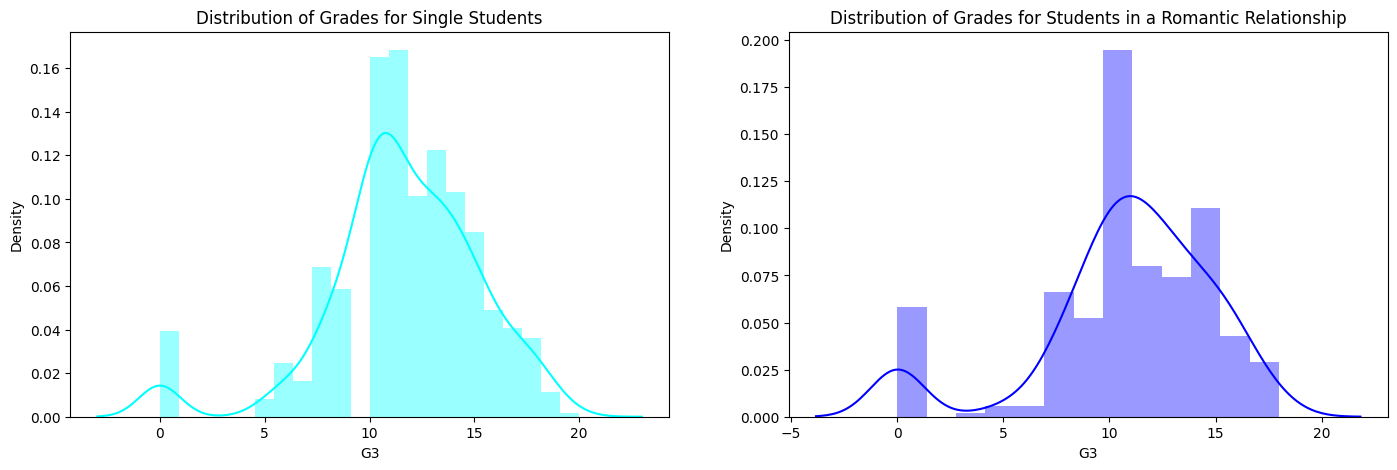

T-test Results:
  - t-statistic: 3.1906332561770294
  - p-value: 0.0014620207651946217


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('Student Info.csv')

# Create a figure with two subplots
f = plt.figure(figsize=(17, 5))

# Subplot for students who are single
ax1 = f.add_subplot(121)
sns.distplot(df[df['romantic'] == 'no']['G3'], color='cyan', ax=ax1)
ax1.set_title('Distribution of Grades for Single Students')

# Subplot for students in a romantic relationship
ax2 = f.add_subplot(122)
sns.distplot(df[df['romantic'] == 'yes']['G3'], color='blue', ax=ax2)
ax2.set_title('Distribution of Grades for Students in a Romantic Relationship')

# Show the plots
plt.show()

# Statistical analysis
single_students_grades = df[df['romantic'] == 'no']['G3']
in_love_students_grades = df[df['romantic'] == 'yes']['G3']

# Perform t-test to compare means
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(single_students_grades, in_love_students_grades)

print(f'T-test Results:\n  - t-statistic: {t_stat}\n  - p-value: {p_value}')


T-test Results:
  - t-statistic: nan
  - p-value: nan


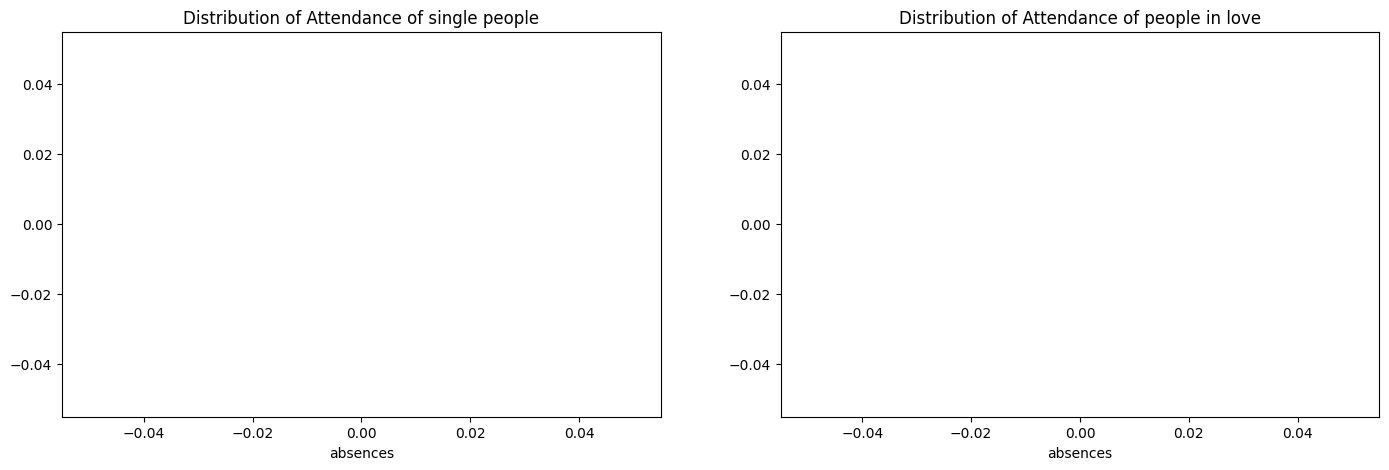

In [ ]:
df = pd.read_csv('Student Info.csv')
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.absences == 'no')]["absences"],color='cyan',ax=ax)
ax.set_title('Distribution of Attendance of single people')

ax=f.add_subplot(122)
sns.distplot(df[(df.absences == 'yes')]['absences'],color='blue',ax=ax)
ax.set_title('Distribution of Attendance of people in love')


# Statistical analysis
single_students_grades = df[df['absences'] == 'no']['G3']
in_love_students_grades = df[df['absences'] == 'yes']['G3']

# Perform t-test to compare means
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(single_students_grades, in_love_students_grades)

print(f'T-test Results:\n  - t-statistic: {t_stat}\n  - p-value: {p_value}')

In [ ]:
ax1 = f.add_subplot(121)
sns.distplot(df[df['romantic'] == 'no']['absences'], color='cyan', ax=ax1)
ax1.set_title('Distribution of Absences for Single Students')

# Subplot for students in a romantic relationship
ax2 = f.add_subplot(122)
sns.distplot(df[df['romantic'] == 'yes']['absences'], color='blue', ax=ax2)
ax2.set_title('Distribution of Absences for Students in a Romantic Relationship')

# Show the plots
plt.show()

# Statistical analysis
single_students_absences = df[df['romantic'] == 'no']['absences']
in_love_students_absences = df[df['romantic'] == 'yes']['absences']

# Perform t-test to compare means
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(single_students_absences, in_love_students_absences, nan_policy='omit')

print(f'T-test Results:\n  - t-statistic: {t_stat}\n  - p-value: {p_value}')

T-test Results:
  - t-statistic: -3.41884366516839
  - p-value: 0.0006532185928934219


The final grades of single students are slightly higher than those who are in a romantic relationship. Of course this is due to the fact that teenagers in love want to spend more time with girlfriend or boyfriend than with a textbook in mathematics. Let's count the number of single students and those who are in a relationship. Hence the grades does not have much difference with the Attenance.

### 5. Internet Access with their Grades

Text(0.5, 1.0, 'How many students have not Internet (yes, i am shocked too)?')

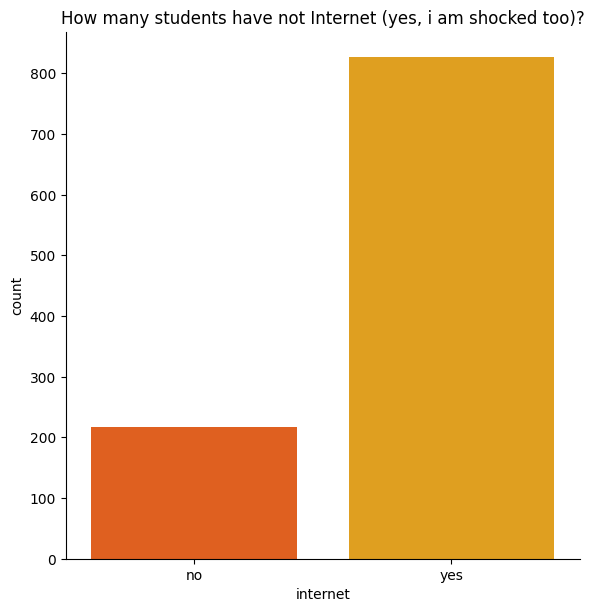

In [ ]:
sns.catplot(x="internet", kind="count",palette="autumn", data=df, height = 6)
plt.title("How many students have not Internet (yes, i am shocked too)?")

First, let's see whether the availability of the Internet affects the number of hours students spend on their studies.

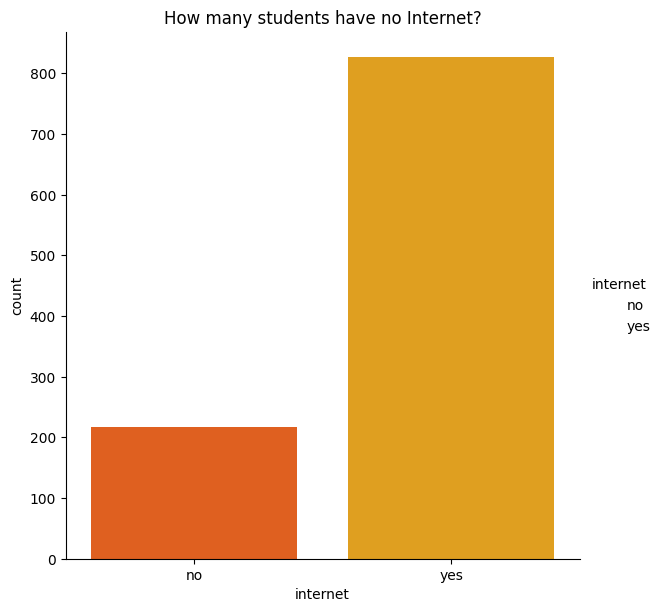

T-test Results:
  - t-statistic: 3.4760044044192497
  - p-value: 0.0005299162064446555


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Read the CSV file into a DataFrame
df = pd.read_csv('Student Info.csv')

# Catplot to visualize the count of students with and without internet
sns.catplot(x="internet", kind="count", palette="autumn", data=df, height=6)
plt.title("How many students have no Internet?")

# Show the plot
plt.show()

# T-test to compare the means of grades for students with and without internet
grades_with_internet = df[df['internet'] == 'yes']['G3']
grades_without_internet = df[df['internet'] == 'no']['G3']

t_stat, p_value = ttest_ind(grades_with_internet, grades_without_internet, nan_policy='omit')

print(f'T-test Results:\n  - t-statistic: {t_stat}\n  - p-value: {p_value}')


<Axes: title={'center': 'Box plot for final grades,depending on the access to the Internet'}, xlabel='G3', ylabel='internet'>

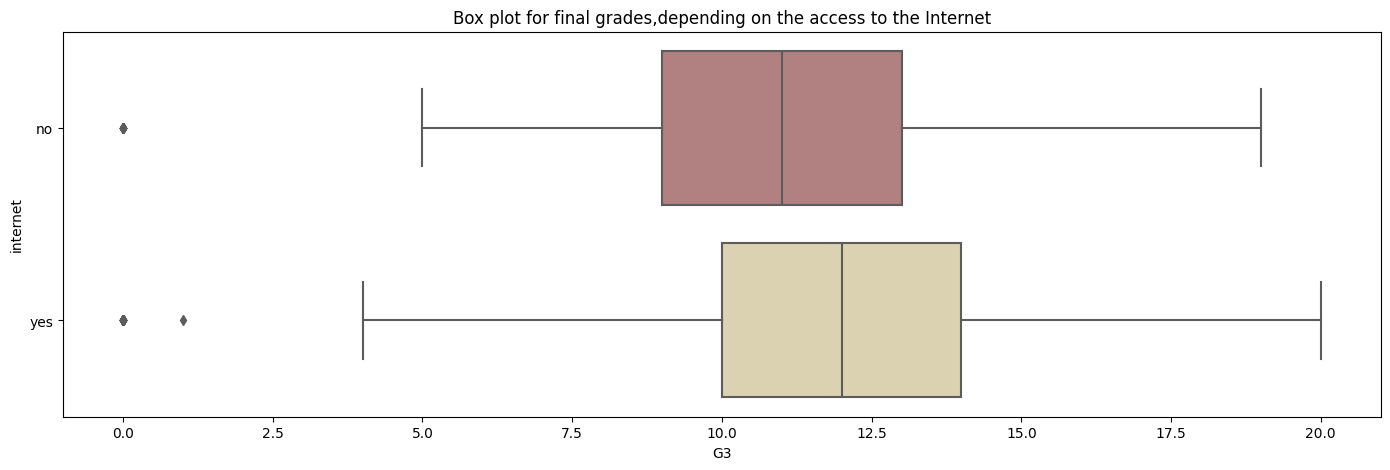

In [ ]:
plt.figure(figsize=(17,5))
plt.title("Box plot for final grades,depending on the access to the Internet")
sns.boxplot(y="internet", x="G3", data = df , orient="h", palette = 'pink')

It seems that mothers working in medicine instill in their children a great love for mathematics. (Someone doesn't like math? Nonsense...) Last but not least, the quality of family relationships. It is a pity that you don't know what put the rating - children or parents.

### 6. GO out and Grades Relation

<Axes: xlabel='G3', ylabel='goout'>

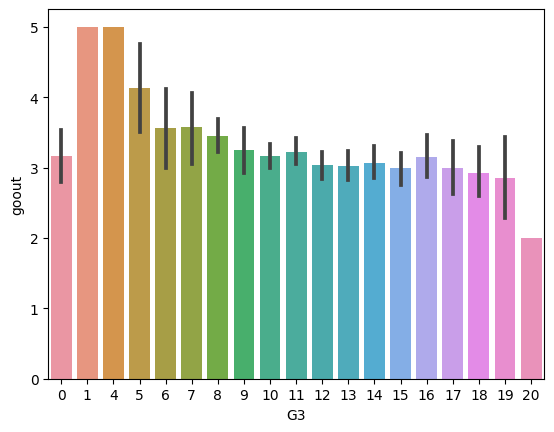

In [ ]:
g3 = df['G3']
go = df['goout']
sns.barplot(x=g3 , y=go , data=df)

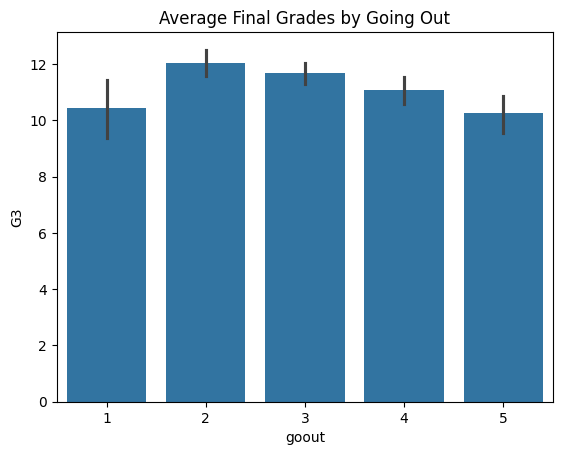

T-test Results:
  - t-statistic: -3.0006376299317674
  - p-value: 0.002907908805828482


In [ ]:
df = pd.read_csv('Student Info.csv')

# Bar plot
sns.barplot(x='goout', y='G3', data=df)
plt.title('Average Final Grades by Going Out')

# Show the plot
plt.show()

# Choose two groups for t-test (e.g., group 1 and group 2)
group_1_grades = df['G3'][df['goout'] == 1]
group_2_grades = df['G3'][df['goout'] == 2]

# Perform t-test
t_stat, p_value = ttest_ind(group_1_grades, group_2_grades, nan_policy='omit')
print(f'T-test Results:\n  - t-statistic: {t_stat}\n  - p-value: {p_value}')

In [ ]:
df['goout'].value_counts()

goout
3    335
2    248
4    227
5    163
1     71
Name: count, dtype: int64

From the abouve graph , It is clear that the once who go out frequently have scored much lesser marks as compared to others

### 3. Address and Thier Grades.

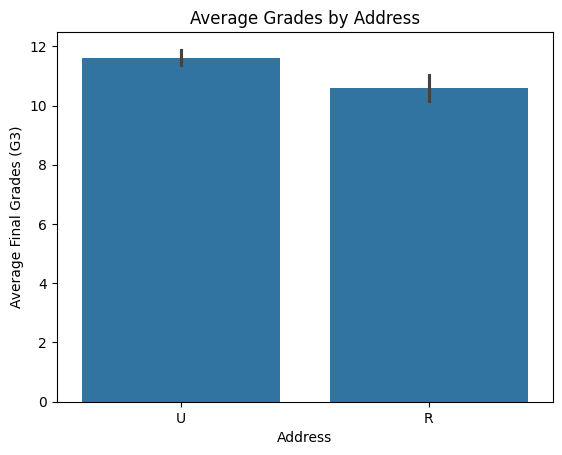

T-test Results:
  - t-statistic: 3.8258059864670932
  - p-value: 0.00013809329728771804


In [ ]:
sns.barplot(x='address', y='G3', data=df)

# Add labels and title
plt.xlabel('Address')
plt.ylabel('Average Final Grades (G3)')
plt.title('Average Grades by Address')

# Show the plot
plt.show()
# T-test
urban_grades = df['G3'][df['address'] == 'U']
rural_grades = df['G3'][df['address'] == 'R']

# Perform t-test
t_stat, p_value = ttest_ind(urban_grades, rural_grades, nan_policy='omit')
print(f'T-test Results:\n  - t-statistic: {t_stat}\n  - p-value: {p_value}')

In [ ]:
address_grade_counts = df.groupby('address')['G3'].value_counts()

print("Counts of 'address' with corresponding 'G3' values:")
print(address_grade_counts)

Counts of 'address' with corresponding 'G3' values:
address  G3
R        10     53
         11     47
         12     29
         8      22
         13     22
         0      20
         9      20
         15     16
         14     16
         16      9
         17      8
         7       8
         18      6
         5       4
         6       3
         19      2
U        11    104
         10    100
         13     91
         14     74
         12     74
         15     66
         8      45
         16     43
         9      43
         0      33
         17     27
         18     21
         6      15
         7      11
         19      5
         5       4
         1       1
         4       1
         20      1
Name: count, dtype: int64


#### For 'R' (Rural) addresses:

#### The most common grade ('G3') is 10 with 53 occurrences.
#### The second most common grade is 11 with 47 occurrences.



#### For 'U' (Urban) addresses:

#### The most common grade ('G3') is 11 with 104 occurrences.
#### The second most common grade is 10 with 100 occurrences.



### Hence the grades are higher for the people from Urban Areas.

### 4. 1. Failures and Grades with their Attendance.

In [ ]:
from scipy.stats import ttest_ind

# Perform t-test between different levels of famrel
high_famrel = df[df['famrel'] >= 4]['failures']
low_famrel = df[df['famrel'] < 4]['failures']

t_stat, p_value = ttest_ind(high_famrel, low_famrel)
print(f'T-test: t-statistic = {t_stat}, p-value = {p_value}')


T-test: t-statistic = -2.671432586966574, p-value = 0.007670582945416903


The t-test results indicate that there is a statistically significant difference in the number of failures between students with high family relationship scores (famrel >= 4) and those with low family relationship scores (famrel < 4). The t-statistic is approximately -2.67, and the p-value is 0.0077. In practical terms, these results suggest that there is evidence to support the idea that family relationship scores are associated with the number of failures. Students with lower family relationship scores tend to have a higher number of failures compared to those with higher family relationship scores.

In [ ]:
from scipy.stats import ttest_ind

# Perform t-test between students with and without school support
with_school_support = df[df['schoolsup'] == 'yes']['failures']
without_school_support = df[df['schoolsup'] == 'no']['failures']

t_stat, p_value = ttest_ind(with_school_support, without_school_support)
print(f'T-test: t-statistic = {t_stat}, p-value = {p_value}')

T-test: t-statistic = 0.08014563221185922, p-value = 0.9361368197344336


### 2. School Support with the Failure

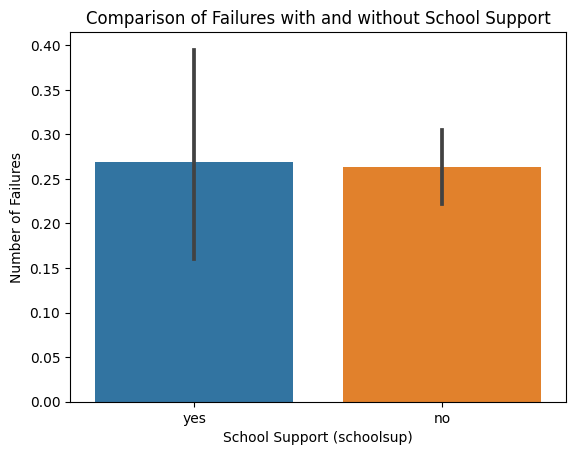

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical plot (bar plot)
sns.barplot(x='schoolsup', y='failures', data=df)
plt.xlabel('School Support (schoolsup)')
plt.ylabel('Number of Failures')
plt.title('Comparison of Failures with and without School Support')
plt.show()


In [ ]:
from scipy.stats import ttest_ind

# Perform t-test between students with and without school support
with_school_support = df[df['schoolsup'] == 'yes']['failures']
without_school_support = df[df['schoolsup'] == 'no']['failures']

t_stat, p_value = ttest_ind(with_school_support, without_school_support)
print(f'T-test: t-statistic = {t_stat}, p-value = {p_value}')

T-test: t-statistic = 0.08014563221185922, p-value = 0.9361368197344336


The t-test results indicate that there is no statistically significant difference in the number of failures between students with and without school support. The t-statistic is approximately 0.08, and the p-value is 0.9361. In practical terms, these results suggest that, based on the sample data, there is no strong evidence to support the idea that the presence or absence of school support is associated with a significant difference in the number of failures.

### 3. Fam Support with the Failures

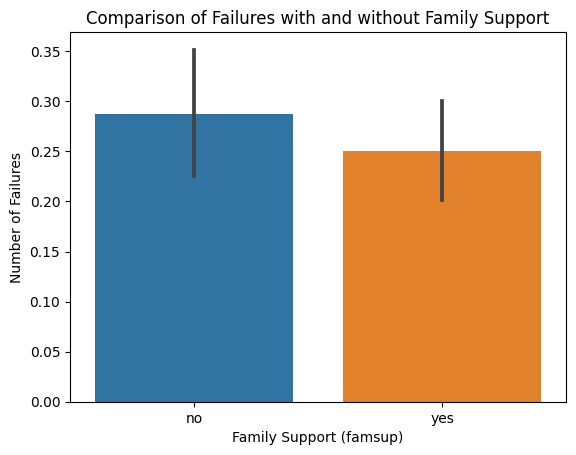

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical plot (bar plot)
sns.barplot(x='famsup', y='failures', data=df)
plt.xlabel('Family Support (famsup)')
plt.ylabel('Number of Failures')
plt.title('Comparison of Failures with and without Family Support')
plt.show()


In [ ]:
from scipy.stats import ttest_ind

# Perform t-test between students with and without family support
with_family_support = df[df['famsup'] == 'yes']['failures']
without_family_support = df[df['famsup'] == 'no']['failures']

t_stat, p_value = ttest_ind(with_family_support, without_family_support)
print(f'T-test: t-statistic = {t_stat}, p-value = {p_value}')


T-test: t-statistic = -0.8904294040797015, p-value = 0.3734408990719965


The t-test results indicate that there is no statistically significant difference in the number of failures between students with and without family support. The t-statistic is approximately -0.89, and the p-value is 0.3734. In practical terms, these results suggest that, based on the sample data, there is no strong evidence to support the idea that the presence or absence of family support is associated with a significant difference in the number of failures.


### 8. Extracicular Activities with their Grades

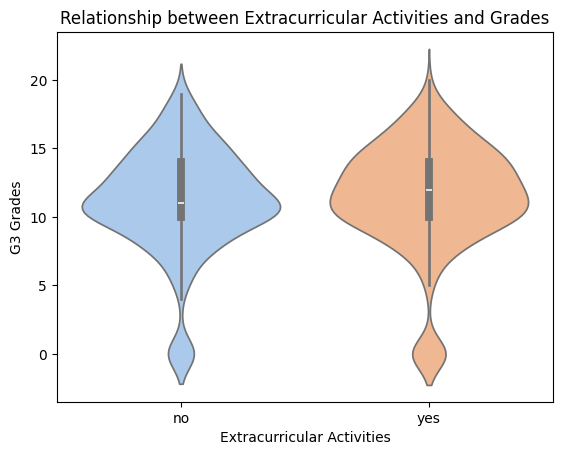

In [ ]:
colors = sns.color_palette("pastel")

sns.violinplot(x='activities', y='G3', data=df,palette=colors)

# Add labels and title
plt.xlabel('Extracurricular Activities')
plt.ylabel('G3 Grades')
plt.title('Relationship between Extracurricular Activities and Grades')

# Show the plot
plt.show()

### The people with the participation is having slight difference with marks higher than the non participants.

In [ ]:
# T-test
with_activities_grades = df['G3'][df['activities'] == 'yes']
without_activities_grades = df['G3'][df['activities'] == 'no']

# Perform t-test
t_stat, p_value = ttest_ind(with_activities_grades, without_activities_grades, nan_policy='omit')
print(f'T-test Results:\n  - t-statistic: {t_stat}\n  - p-value: {p_value}')

T-test Results:
  - t-statistic: 1.0981030934993468
  - p-value: 0.27241314813987716


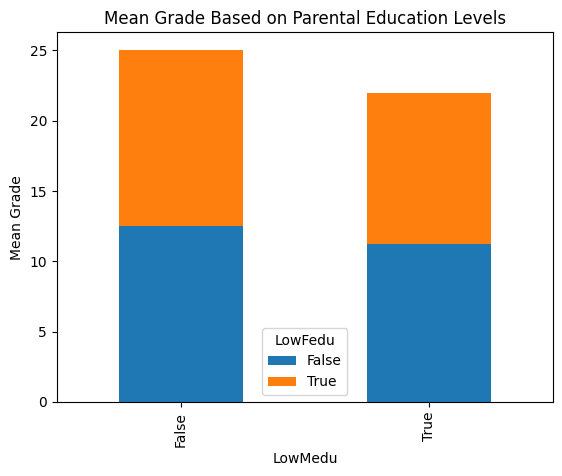

T-test for Medu: t-statistic = -6.406548600668245, p-value = 2.2496046028953038e-10
T-test for Fedu: t-statistic = -4.4385775875144615, p-value = 1.0019522198180842e-05
ANOVA for Medu: F-statistic = 41.04386497272422, p-value = 2.2496046028958856e-10
ANOVA for Fedu: F-statistic = 19.700971000385707, p-value = 1.0019522198183058e-05


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway

# Assuming df is your DataFrame

# Create two categories for parental education levels (e.g., low and high)
df['LowMedu'] = df['Medu'] <= df['Medu'].median()
df['LowFedu'] = df['Fedu'] <= df['Fedu'].median()

# T-test for Medu
t_statistic_medu, p_value_medu = ttest_ind(df[df['LowMedu']]['G3'], df[~df['LowMedu']]['G3'])

# T-test for Fedu
t_statistic_fedu, p_value_fedu = ttest_ind(df[df['LowFedu']]['G3'], df[~df['LowFedu']]['G3'])

# ANOVA for both Medu and Fedu
anova_result_medu = f_oneway(df[df['LowMedu']]['G3'], df[~df['LowMedu']]['G3'])
anova_result_fedu = f_oneway(df[df['LowFedu']]['G3'], df[~df['LowFedu']]['G3'])

# Plotting the bar chart
grouped_df = df.groupby(['LowMedu', 'LowFedu'])['G3'].mean().unstack()
grouped_df.plot(kind='bar', stacked=True)
plt.ylabel('Mean Grade')
plt.title('Mean Grade Based on Parental Education Levels')
plt.show()

# Displaying results
print(f"T-test for Medu: t-statistic = {t_statistic_medu}, p-value = {p_value_medu}")
print(f"T-test for Fedu: t-statistic = {t_statistic_fedu}, p-value = {p_value_fedu}")
print(f"ANOVA for Medu: F-statistic = {anova_result_medu.statistic}, p-value = {anova_result_medu.pvalue}")
print(f"ANOVA for Fedu: F-statistic = {anova_result_fedu.statistic}, p-value = {anova_result_fedu.pvalue}")


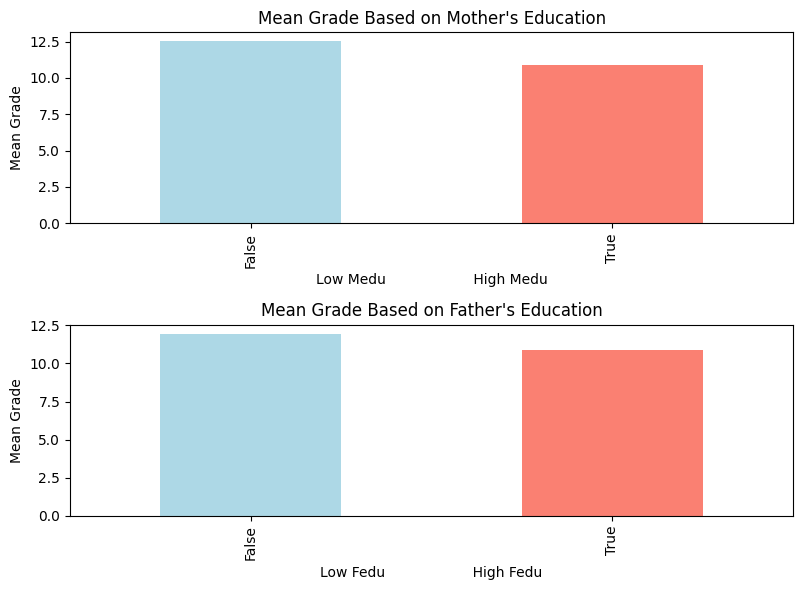

T-test for Medu: t-statistic = -6.406548600668245, p-value = 2.2496046028953038e-10
T-test for Fedu: t-statistic = -4.4385775875144615, p-value = 1.0019522198180842e-05
ANOVA for Medu: F-statistic = 41.04386497272422, p-value = 2.2496046028958856e-10
ANOVA for Fedu: F-statistic = 19.700971000385707, p-value = 1.0019522198183058e-05


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway

# Assuming df is your DataFrame

# Create two categories for parental education levels (e.g., low and high)
df['LowMedu'] = df['Medu'] <= df['Medu'].median()
df['LowFedu'] = df['Fedu'] <= df['Fedu'].median()

# T-test for Medu
t_statistic_medu, p_value_medu = ttest_ind(df[df['LowMedu']]['G3'], df[~df['LowMedu']]['G3'])

# T-test for Fedu
t_statistic_fedu, p_value_fedu = ttest_ind(df[df['LowFedu']]['G3'], df[~df['LowFedu']]['G3'])

# ANOVA for both Medu and Fedu
anova_result_medu = f_oneway(df[df['LowMedu']]['G3'], df[~df['LowMedu']]['G3'])
anova_result_fedu = f_oneway(df[df['LowFedu']]['G3'], df[~df['LowFedu']]['G3'])

# Plotting the bar chart
plt.figure(figsize=(8, 6))

# Bar chart for Medu
plt.subplot(2, 1, 1)
df.groupby('LowMedu')['G3'].mean().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Mean Grade Based on Mother\'s Education')
plt.xlabel('Low Medu                    High Medu')
plt.ylabel('Mean Grade')

# Bar chart for Fedu
plt.subplot(2, 1, 2)
df.groupby('LowFedu')['G3'].mean().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Mean Grade Based on Father\'s Education')
plt.xlabel('Low Fedu                    High Fedu')
plt.ylabel('Mean Grade')

plt.tight_layout()
plt.show()

# Displaying results
print(f"T-test for Medu: t-statistic = {t_statistic_medu}, p-value = {p_value_medu}")
print(f"T-test for Fedu: t-statistic = {t_statistic_fedu}, p-value = {p_value_fedu}")
print(f"ANOVA for Medu: F-statistic = {anova_result_medu.statistic}, p-value = {anova_result_medu.pvalue}")
print(f"ANOVA for Fedu: F-statistic = {anova_result_fedu.statistic}, p-value = {anova_result_fedu.pvalue}")


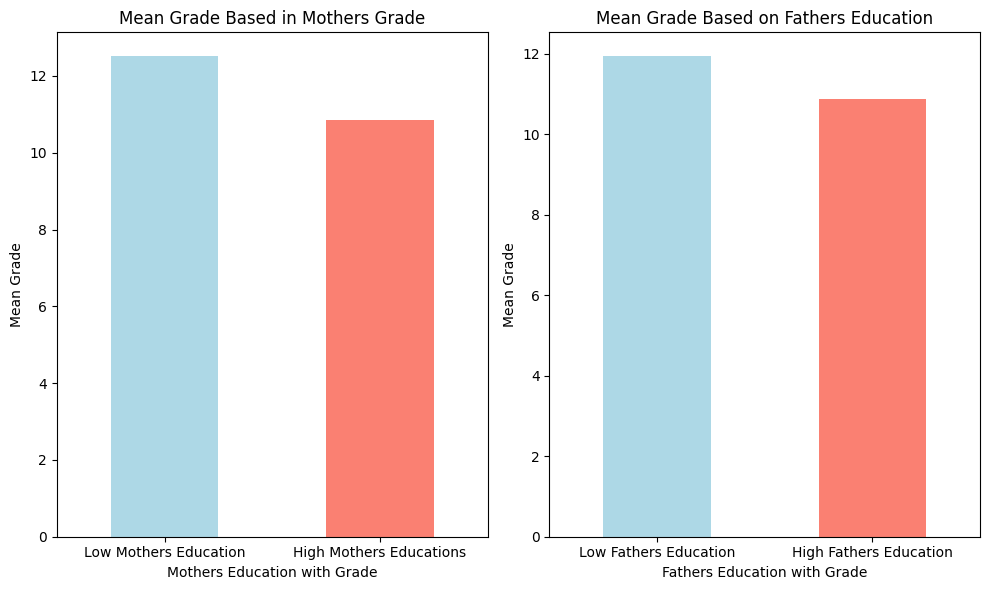

T-test for Medu: t-statistic = -6.406548600668245, p-value = 2.2496046028953038e-10
T-test for Fedu: t-statistic = -4.4385775875144615, p-value = 1.0019522198180842e-05


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway

# Assuming df is your DataFrame

# Create two categories for parental education levels (e.g., low and high)
df['LowMedu'] = df['Medu'] <= df['Medu'].median()
df['LowFedu'] = df['Fedu'] <= df['Fedu'].median()

# T-test for Medu
t_statistic_medu, p_value_medu = ttest_ind(df[df['LowMedu']]['G3'], df[~df['LowMedu']]['G3'])

# T-test for Fedu
t_statistic_fedu, p_value_fedu = ttest_ind(df[df['LowFedu']]['G3'], df[~df['LowFedu']]['G3'])

# Plotting the simplified bar charts
plt.figure(figsize=(10, 6))

# Bar chart for Medu
plt.subplot(1, 2, 1)
df.groupby('LowMedu')['G3'].mean().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Mean Grade Based in Mothers Grade')
plt.xlabel('Mothers Education with Grade')
plt.ylabel('Mean Grade')
plt.xticks([0, 1], ['Low Mothers Education', 'High Mothers Educations'], rotation=0)

# Bar chart for Fedu
plt.subplot(1, 2, 2)
df.groupby('LowFedu')['G3'].mean().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Mean Grade Based on Fathers Education')
plt.xlabel('Fathers Education with Grade')
plt.ylabel('Mean Grade')
plt.xticks([0, 1], ['Low Fathers Education', 'High Fathers Education'], rotation=0)

plt.tight_layout()
plt.show()

# Displaying results
print(f"T-test for Medu: t-statistic = {t_statistic_medu}, p-value = {p_value_medu}")
print(f"T-test for Fedu: t-statistic = {t_statistic_fedu}, p-value = {p_value_fedu}")
